In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
df = pd.read_csv('2018_2019_24-59mos_wasting_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 42
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'electrct1', 'drinksafe', 'makesafe', 'wcooking', 'whands',
       'collect', 'burn', 'composting', 'dump', 'segregate', 'wasting'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,wasting
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,0
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,0
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,1


In [3]:
data = df[["bw_grams","psoc_hh","wcooking","psccat_mom",
           "educ_hh","agemos","drinkingwater","wasting"]]

In [4]:
data.head()

,bw_grams,psoc_hh,wcooking,psccat_mom,educ_hh,agemos,drinkingwater,wasting
0,2400,6,2,0,3,48,0,0
1,2500,99,2,2,2,34,1,0
2,2500,6,2,0,1,51,0,0
3,3200,6,2,0,2,51,0,0
4,2800,8,2,0,1,28,1,1


In [5]:
data.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'psccat_mom', 'educ_hh', 'agemos',
       'drinkingwater', 'wasting'],
      dtype='object')

In [6]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())
data = data.drop_duplicates()

'Total number of of Duplicates present in data: 373'

In [7]:
data = data.drop_duplicates()

In [8]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

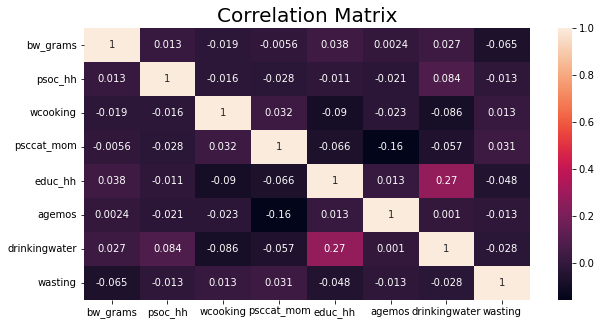

In [9]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [10]:
data['wasting'].value_counts()

0    13351
1      718
Name: wasting, dtype: int64

In [11]:
Final = df[["bw_grams","psoc_hh","wcooking","psccat_mom",
           "educ_hh","agemos","drinkingwater"]]
Target =df['wasting']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [13]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.950
Accuracy score : 0.9525787469712703


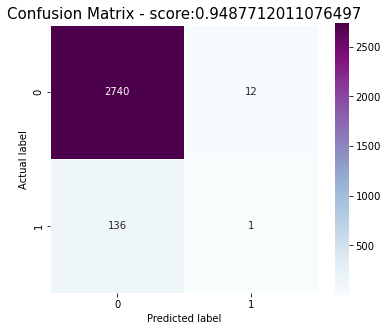

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2752
           1       0.08      0.01      0.01       137

    accuracy                           0.95      2889
   macro avg       0.51      0.50      0.49      2889
weighted avg       0.91      0.95      0.93      2889



In [14]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


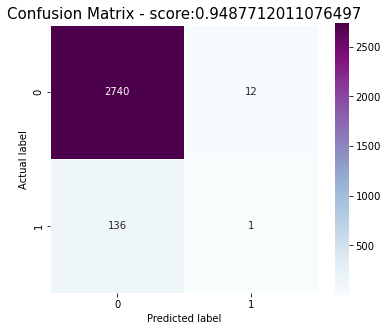

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2752
           1       0.08      0.01      0.01       137

    accuracy                           0.95      2889
   macro avg       0.51      0.50      0.49      2889
weighted avg       0.91      0.95      0.93      2889



In [15]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [16]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.wasting==0]
df_2 = data[data.wasting==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=13351,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.wasting.value_counts()
df_upsampled.reset_index(drop=True)

,bw_grams,psoc_hh,wcooking,psccat_mom,educ_hh,agemos,drinkingwater,wasting
0,2400,6,2,0,3,48,0,0
1,2500,99,2,2,2,34,1,0
2,2500,6,2,0,1,51,0,0
3,3200,6,2,0,2,51,0,0
4,2700,8,2,0,1,40,1,0
...,...,...,...,...,...,...,...,...
26697,2000,6,2,0,1,59,0,1
26698,3400,5,3,0,2,42,0,1
26699,2818,8,1,2,3,59,0,1
26700,2300,6,1,2,1,33,1,1


In [17]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'psccat_mom', 'educ_hh', 'agemos',
       'drinkingwater', 'wasting'],
      dtype='object')

In [18]:
Final =df_upsampled[["bw_grams","psoc_hh","wcooking","psccat_mom",
           "educ_hh","agemos","drinkingwater"]]
Target =df_upsampled['wasting']

In [19]:
Final.head()

,bw_grams,psoc_hh,wcooking,psccat_mom,educ_hh,agemos,drinkingwater
0,2400,6,2,0,3,48,0
1,2500,99,2,2,2,34,1
2,2500,6,2,0,1,51,0
3,3200,6,2,0,2,51,0
5,2700,8,2,0,1,40,1


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [21]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.575
Accuracy score : 0.5624414903576109


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


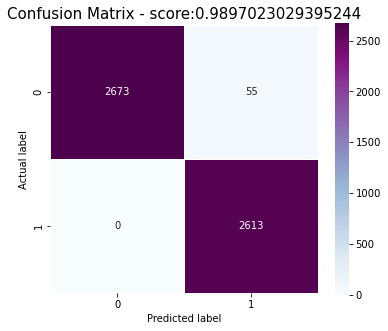

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2728
           1       0.98      1.00      0.99      2613

    accuracy                           0.99      5341
   macro avg       0.99      0.99      0.99      5341
weighted avg       0.99      0.99      0.99      5341



In [22]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [23]:
df_upsampled.head()

,bw_grams,psoc_hh,wcooking,psccat_mom,educ_hh,agemos,drinkingwater,wasting
0,2400,6,2,0,3,48,0,0
1,2500,99,2,2,2,34,1,0
2,2500,6,2,0,1,51,0,0
3,3200,6,2,0,2,51,0,0
5,2700,8,2,0,1,40,1,0


In [24]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'wcooking', 'psccat_mom', 'educ_hh', 'agemos',
       'drinkingwater', 'wasting'],
      dtype='object')

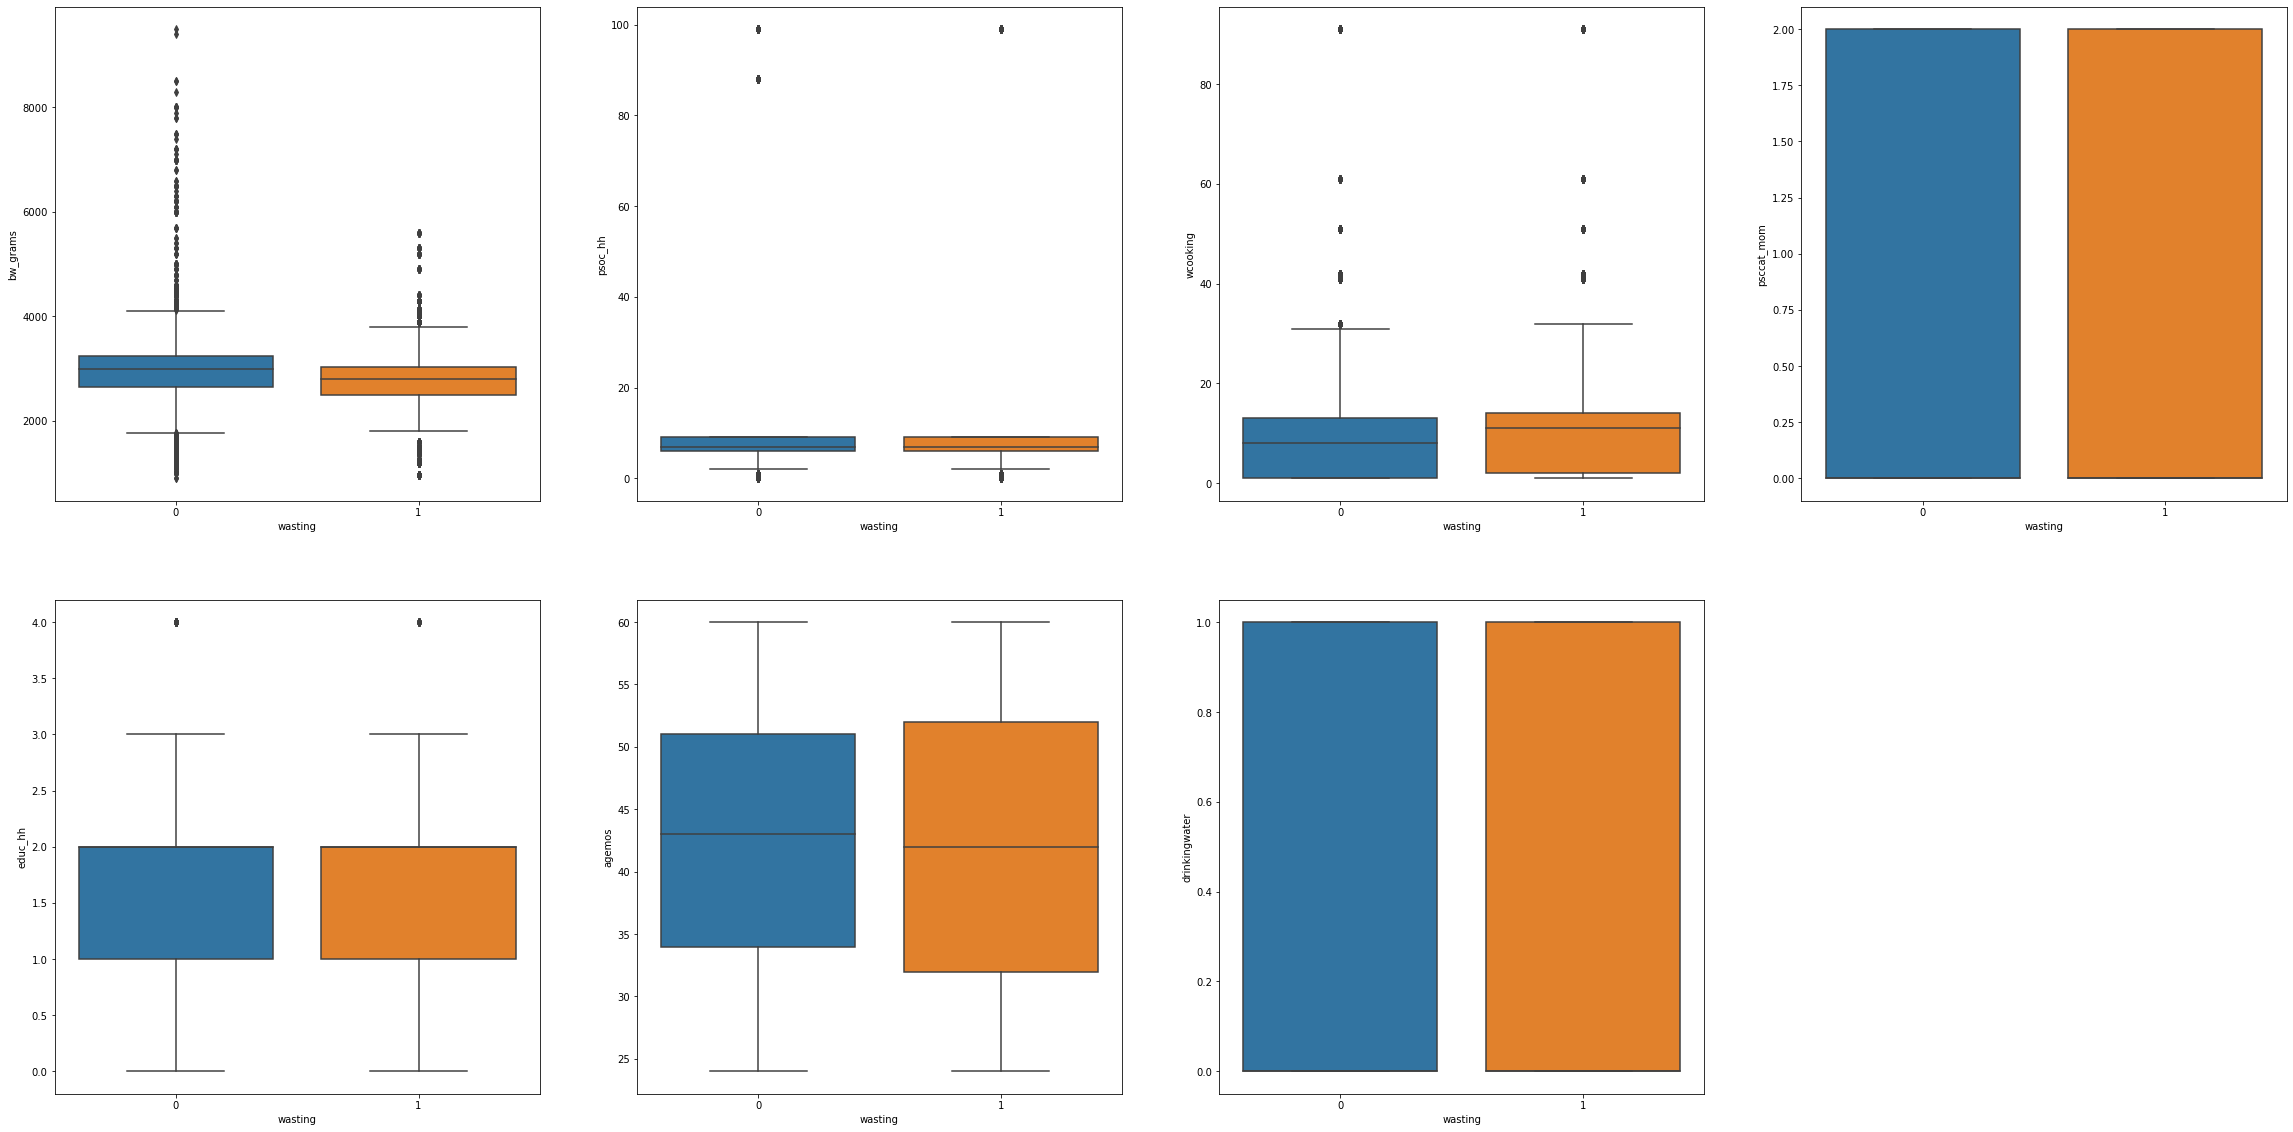

In [25]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [26]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

In [27]:
lr,ur=outlier(df_upsampled['wcooking'][df_upsampled.wasting==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking > ur) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking < lr) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    13351
0    11660
dtype: int64

In [28]:
lr,ur=outlier(df_upsampled['wcooking'][df_upsampled.wasting==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking > ur) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking < lr) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    11901
0    11660
dtype: int64

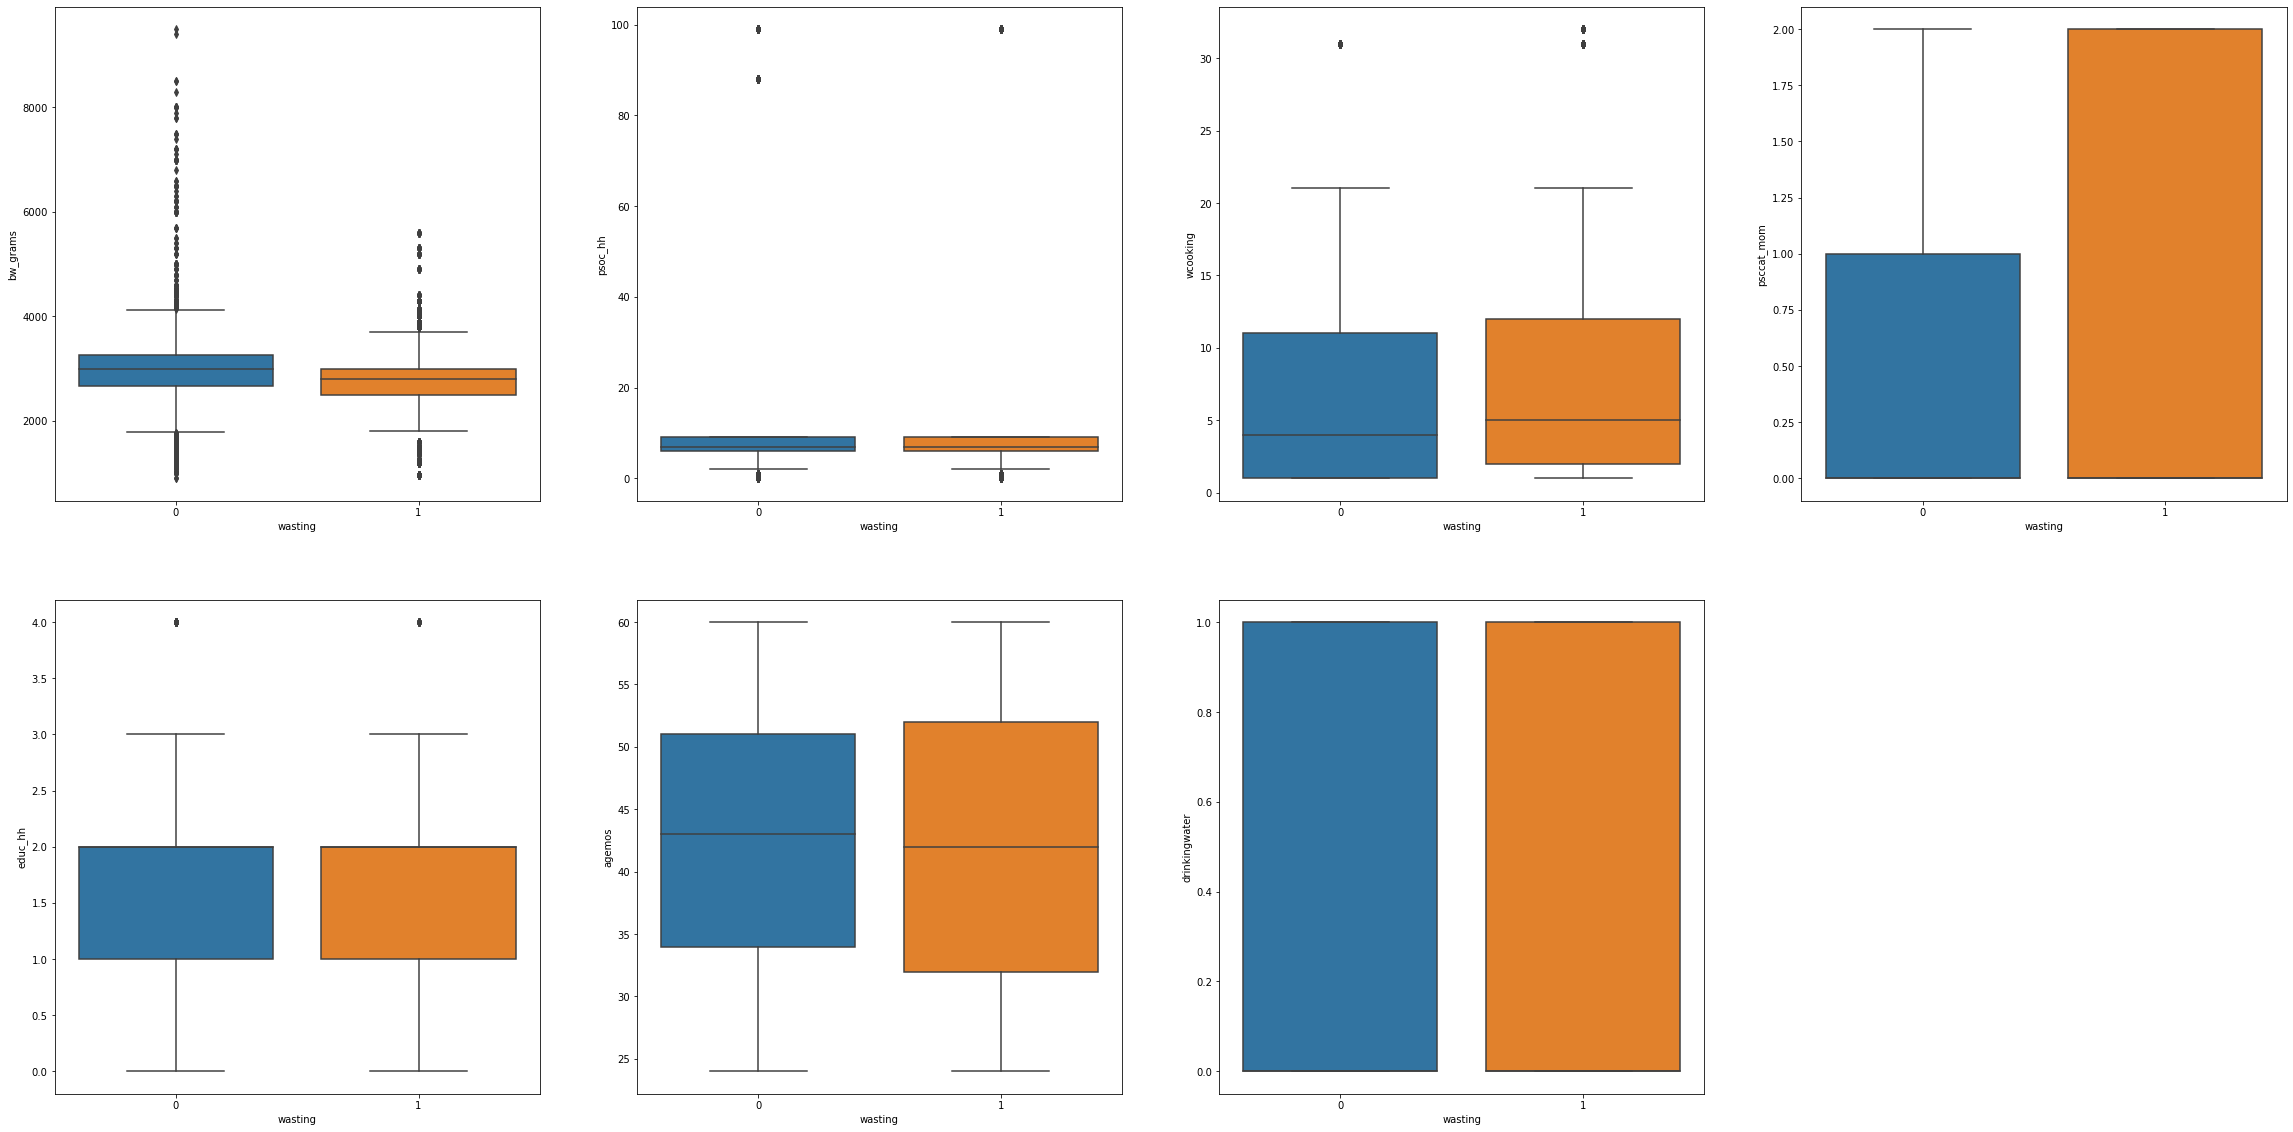

In [29]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [30]:
lr,ur=outlier(df_upsampled['psoc_hh'][df_upsampled.wasting==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh > ur) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh < lr) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    11901
0     9691
dtype: int64

In [31]:
lr,ur=outlier(df_upsampled['psoc_hh'][df_upsampled.wasting==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh > ur) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.psoc_hh < lr) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    10343
0     9691
dtype: int64

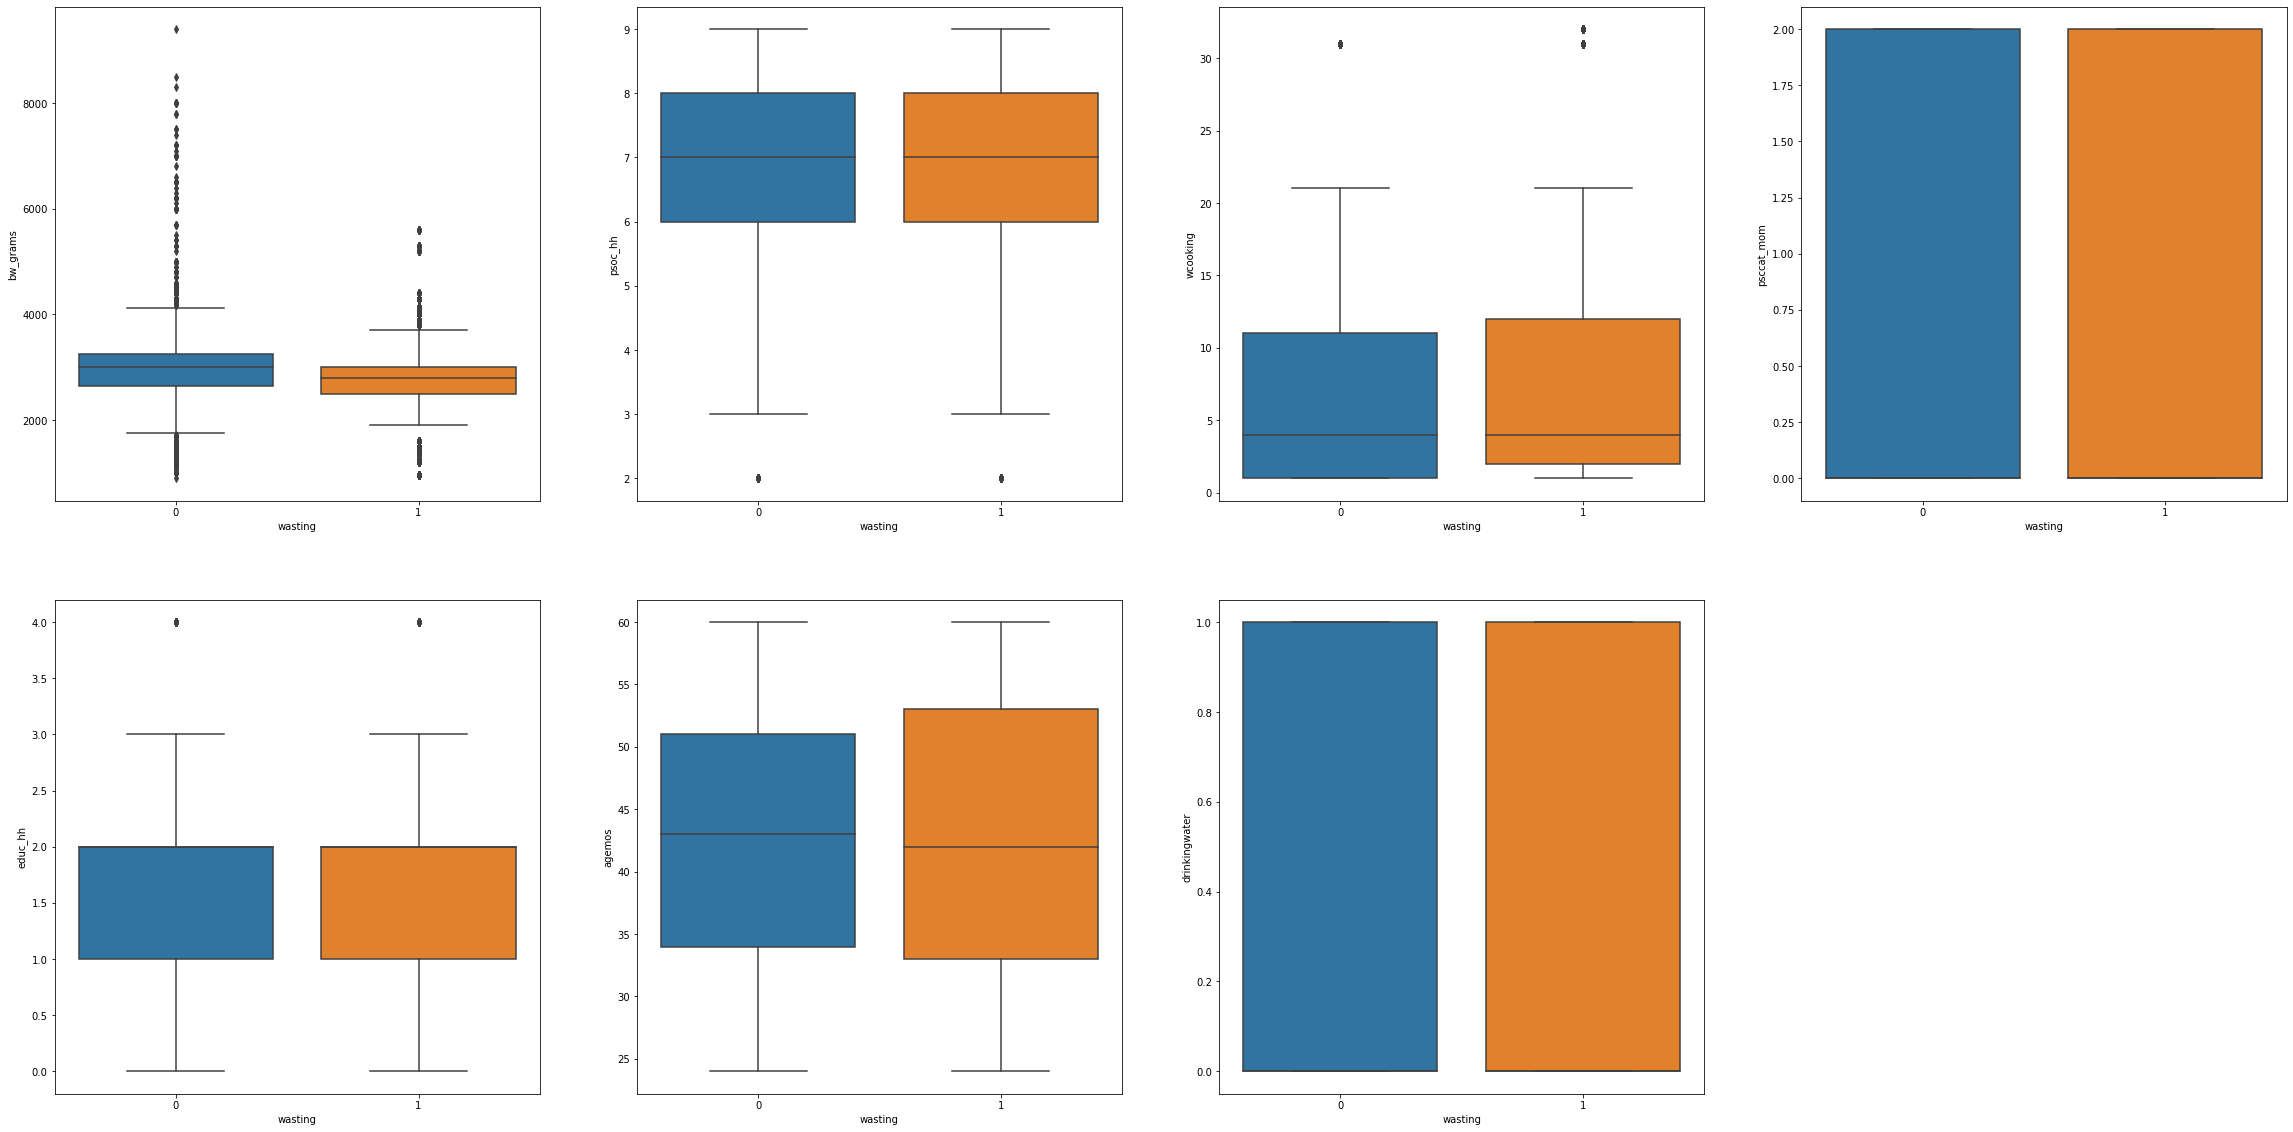

In [32]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [33]:
lr,ur=outlier(df_upsampled['bw_grams'][df_upsampled.wasting==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams > ur) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams < lr) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    10343
0     9347
dtype: int64

In [34]:
lr,ur=outlier(df_upsampled['bw_grams'][df_upsampled.wasting==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams > ur) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams < lr) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    9795
0    9347
dtype: int64

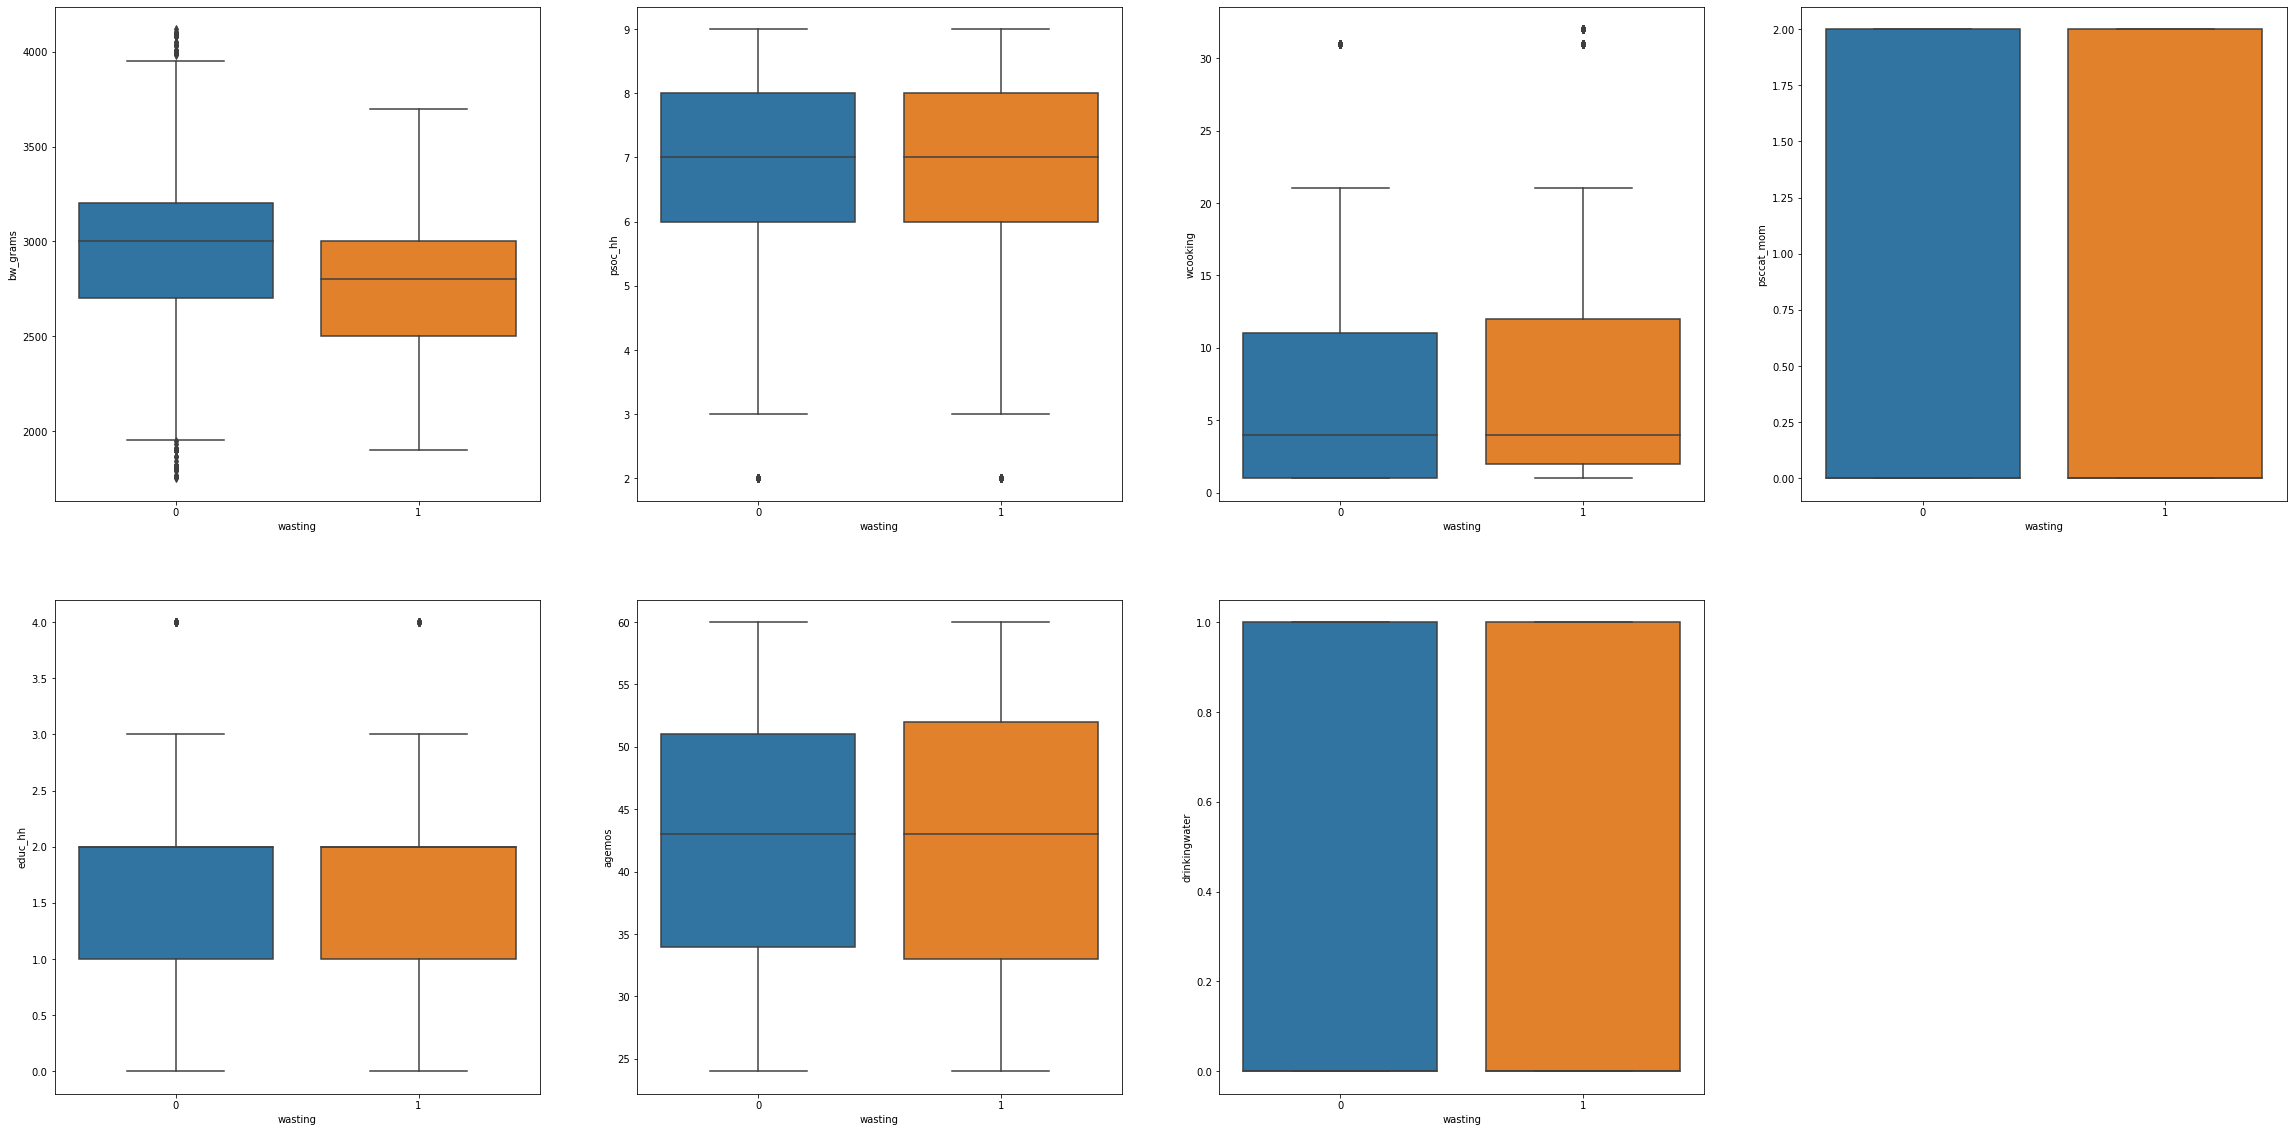

In [35]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [36]:
lr,ur=outlier(df_upsampled['bw_grams'][df_upsampled.wasting==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams > ur) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bw_grams < lr) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    9795
0    9088
dtype: int64

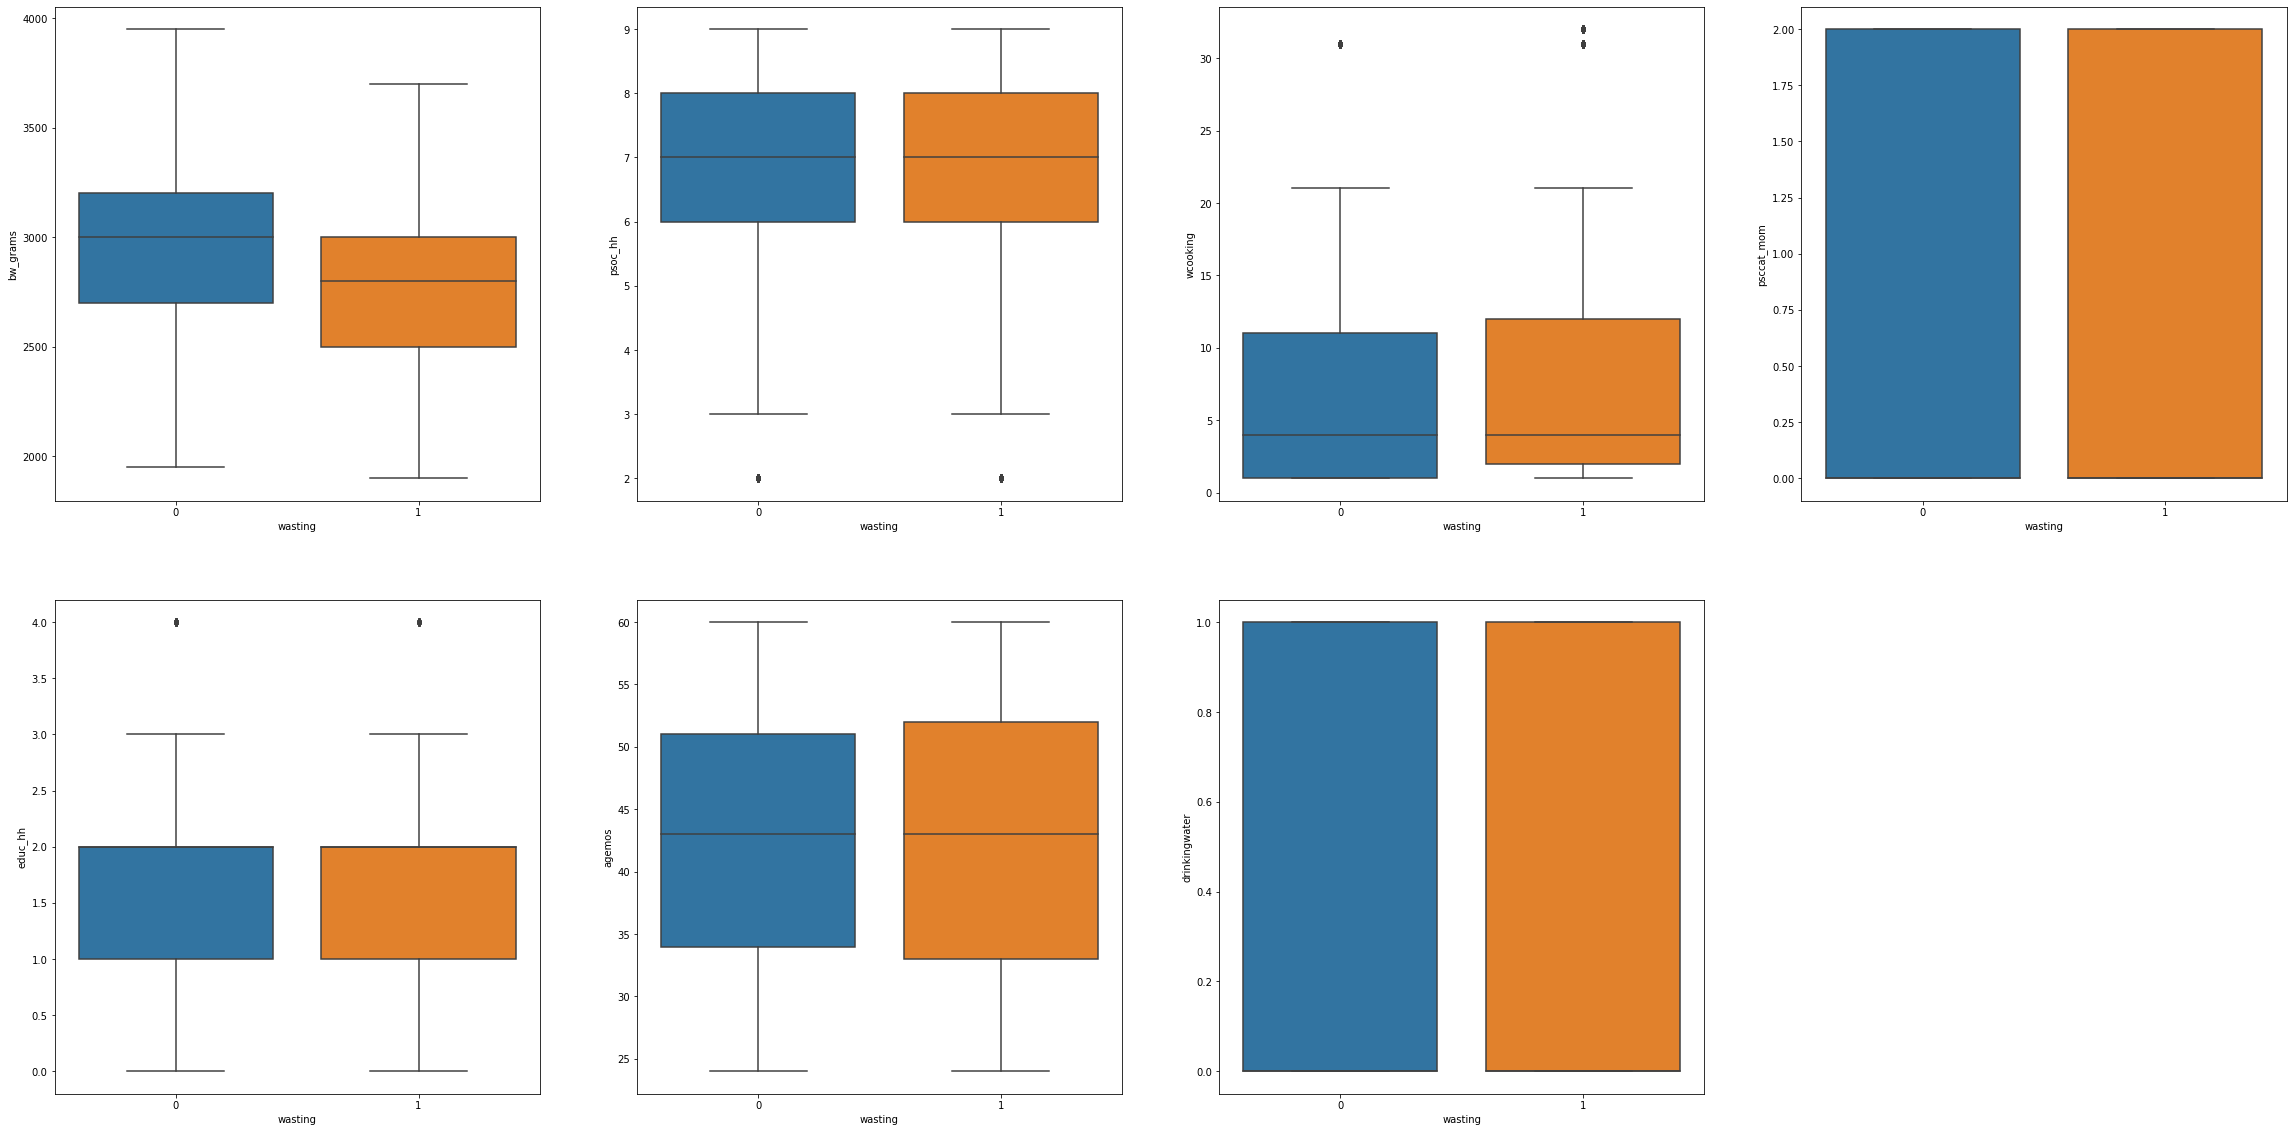

In [37]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [38]:
lr,ur=outlier(df_upsampled['wcooking'][df_upsampled.wasting==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking > ur) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking < lr) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    9178
0    9088
dtype: int64

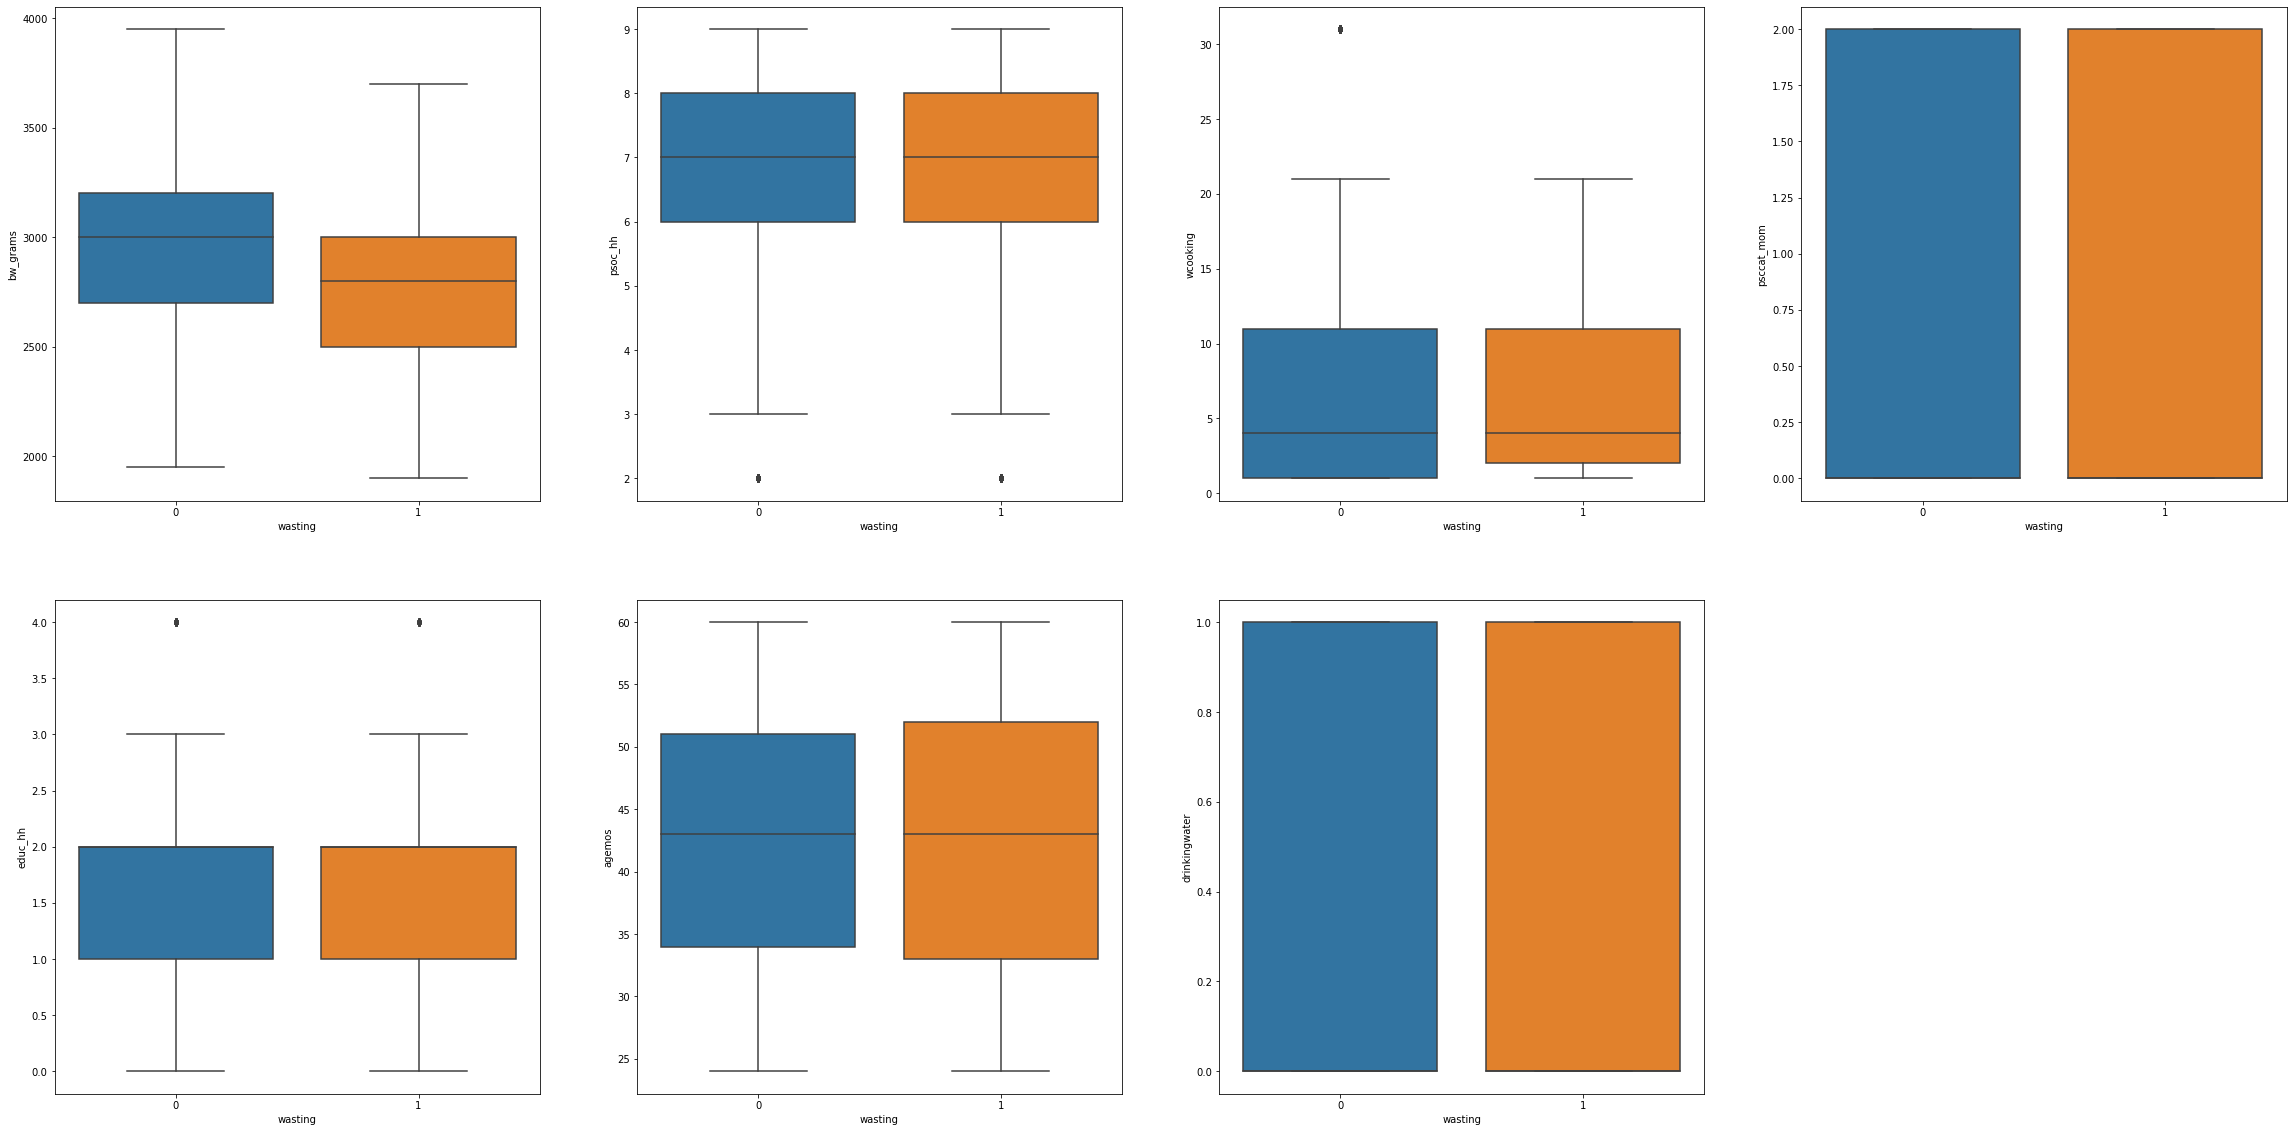

In [39]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [40]:
lr,ur=outlier(df_upsampled['wcooking'][df_upsampled.wasting==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking > ur) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.wcooking < lr) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    9178
0    8830
dtype: int64

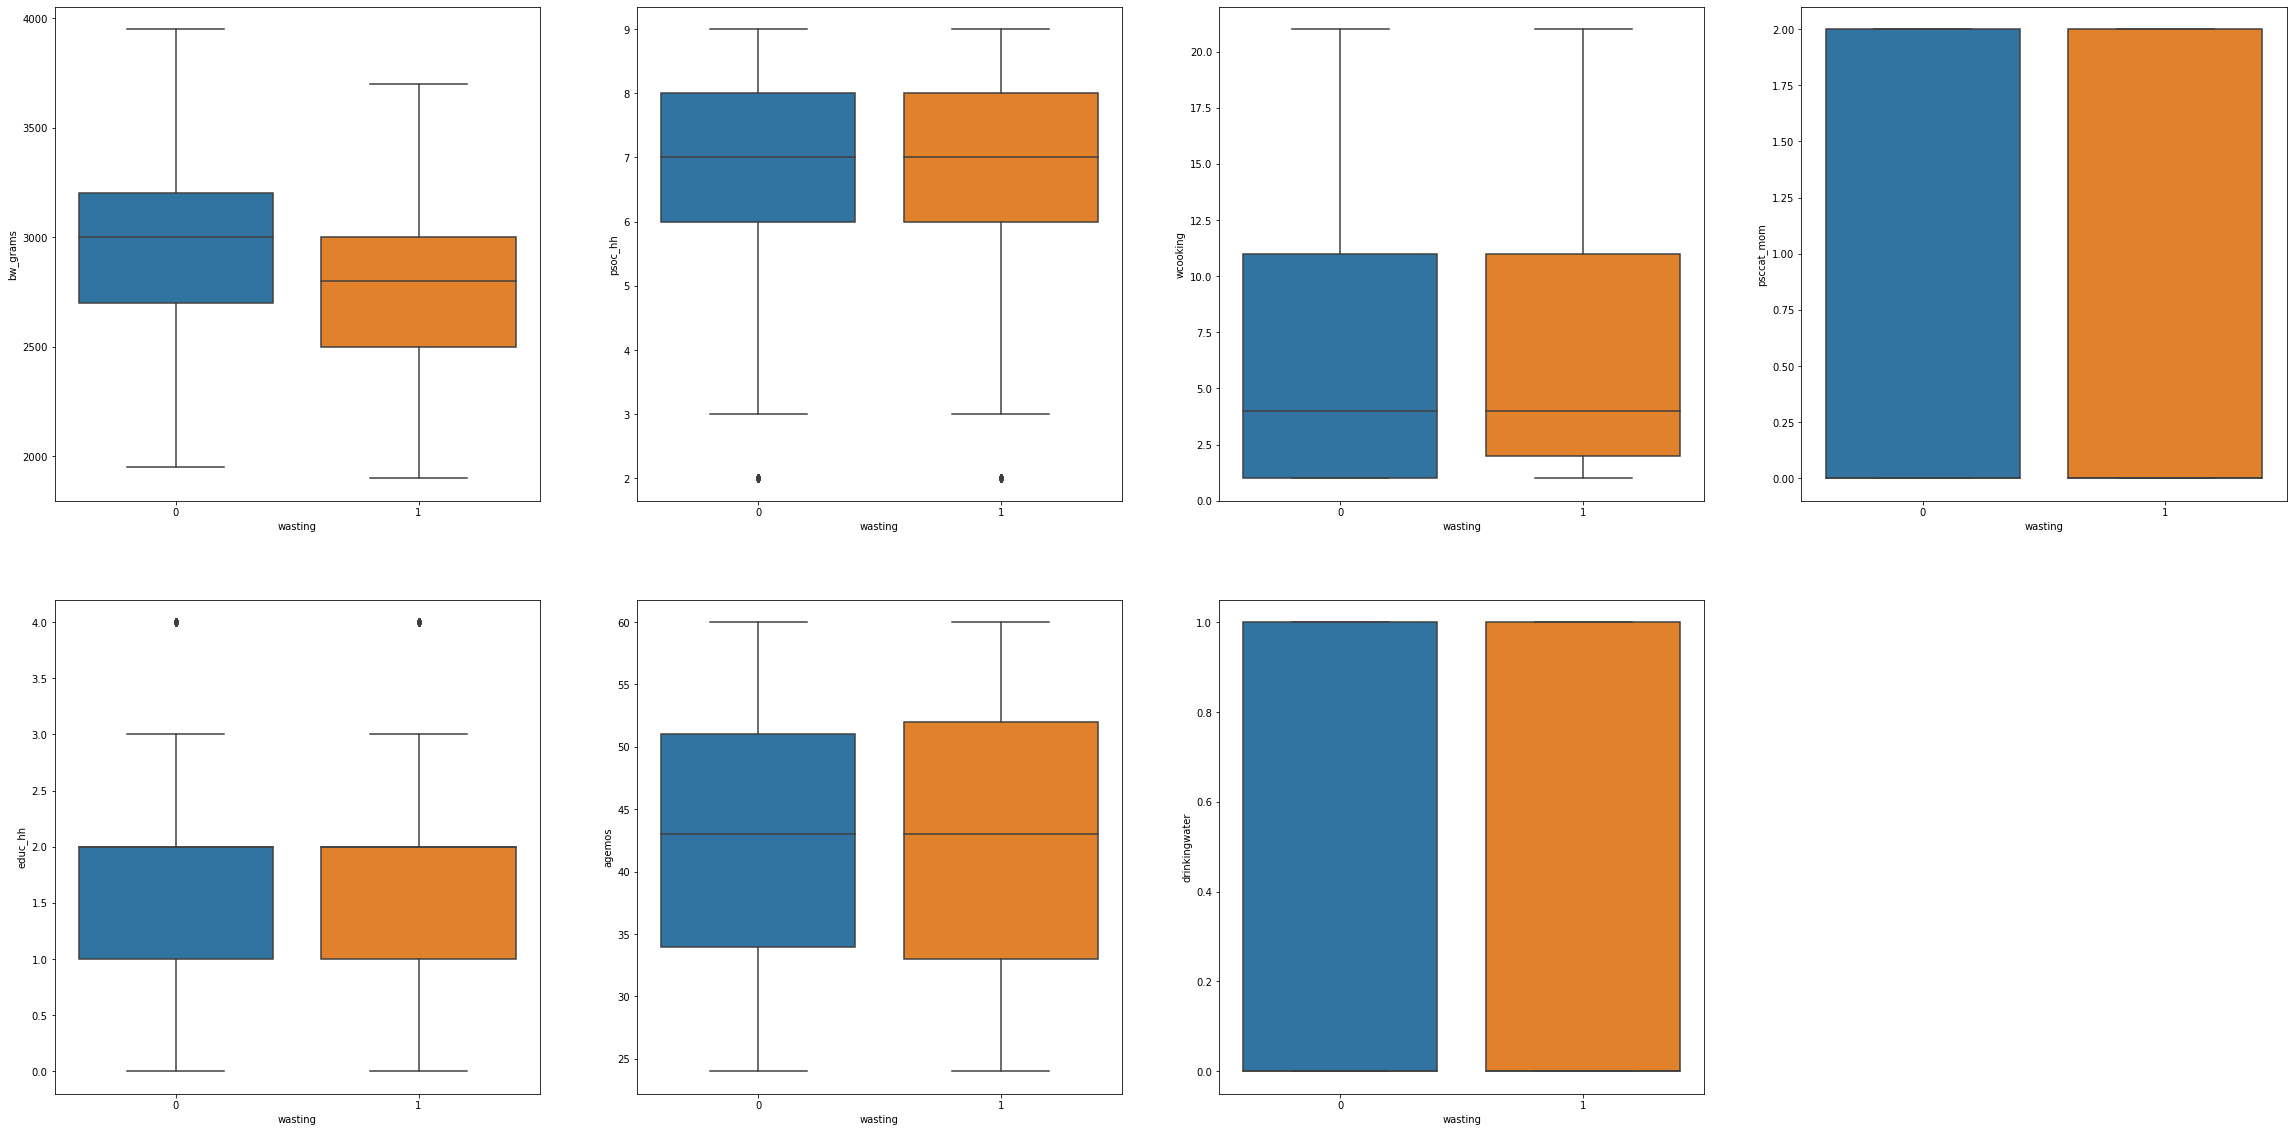

In [41]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [42]:
lr,ur=outlier(df_upsampled['educ_hh'][df_upsampled.wasting==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.educ_hh > ur) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.educ_hh < lr) & (df_upsampled.wasting == 0)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    9178
0    8804
dtype: int64

In [43]:
lr,ur=outlier(df_upsampled['educ_hh'][df_upsampled.wasting==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.educ_hh > ur) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.educ_hh < lr) & (df_upsampled.wasting == 1)],inplace=True)
df_upsampled.value_counts('wasting')

wasting
1    9158
0    8804
dtype: int64

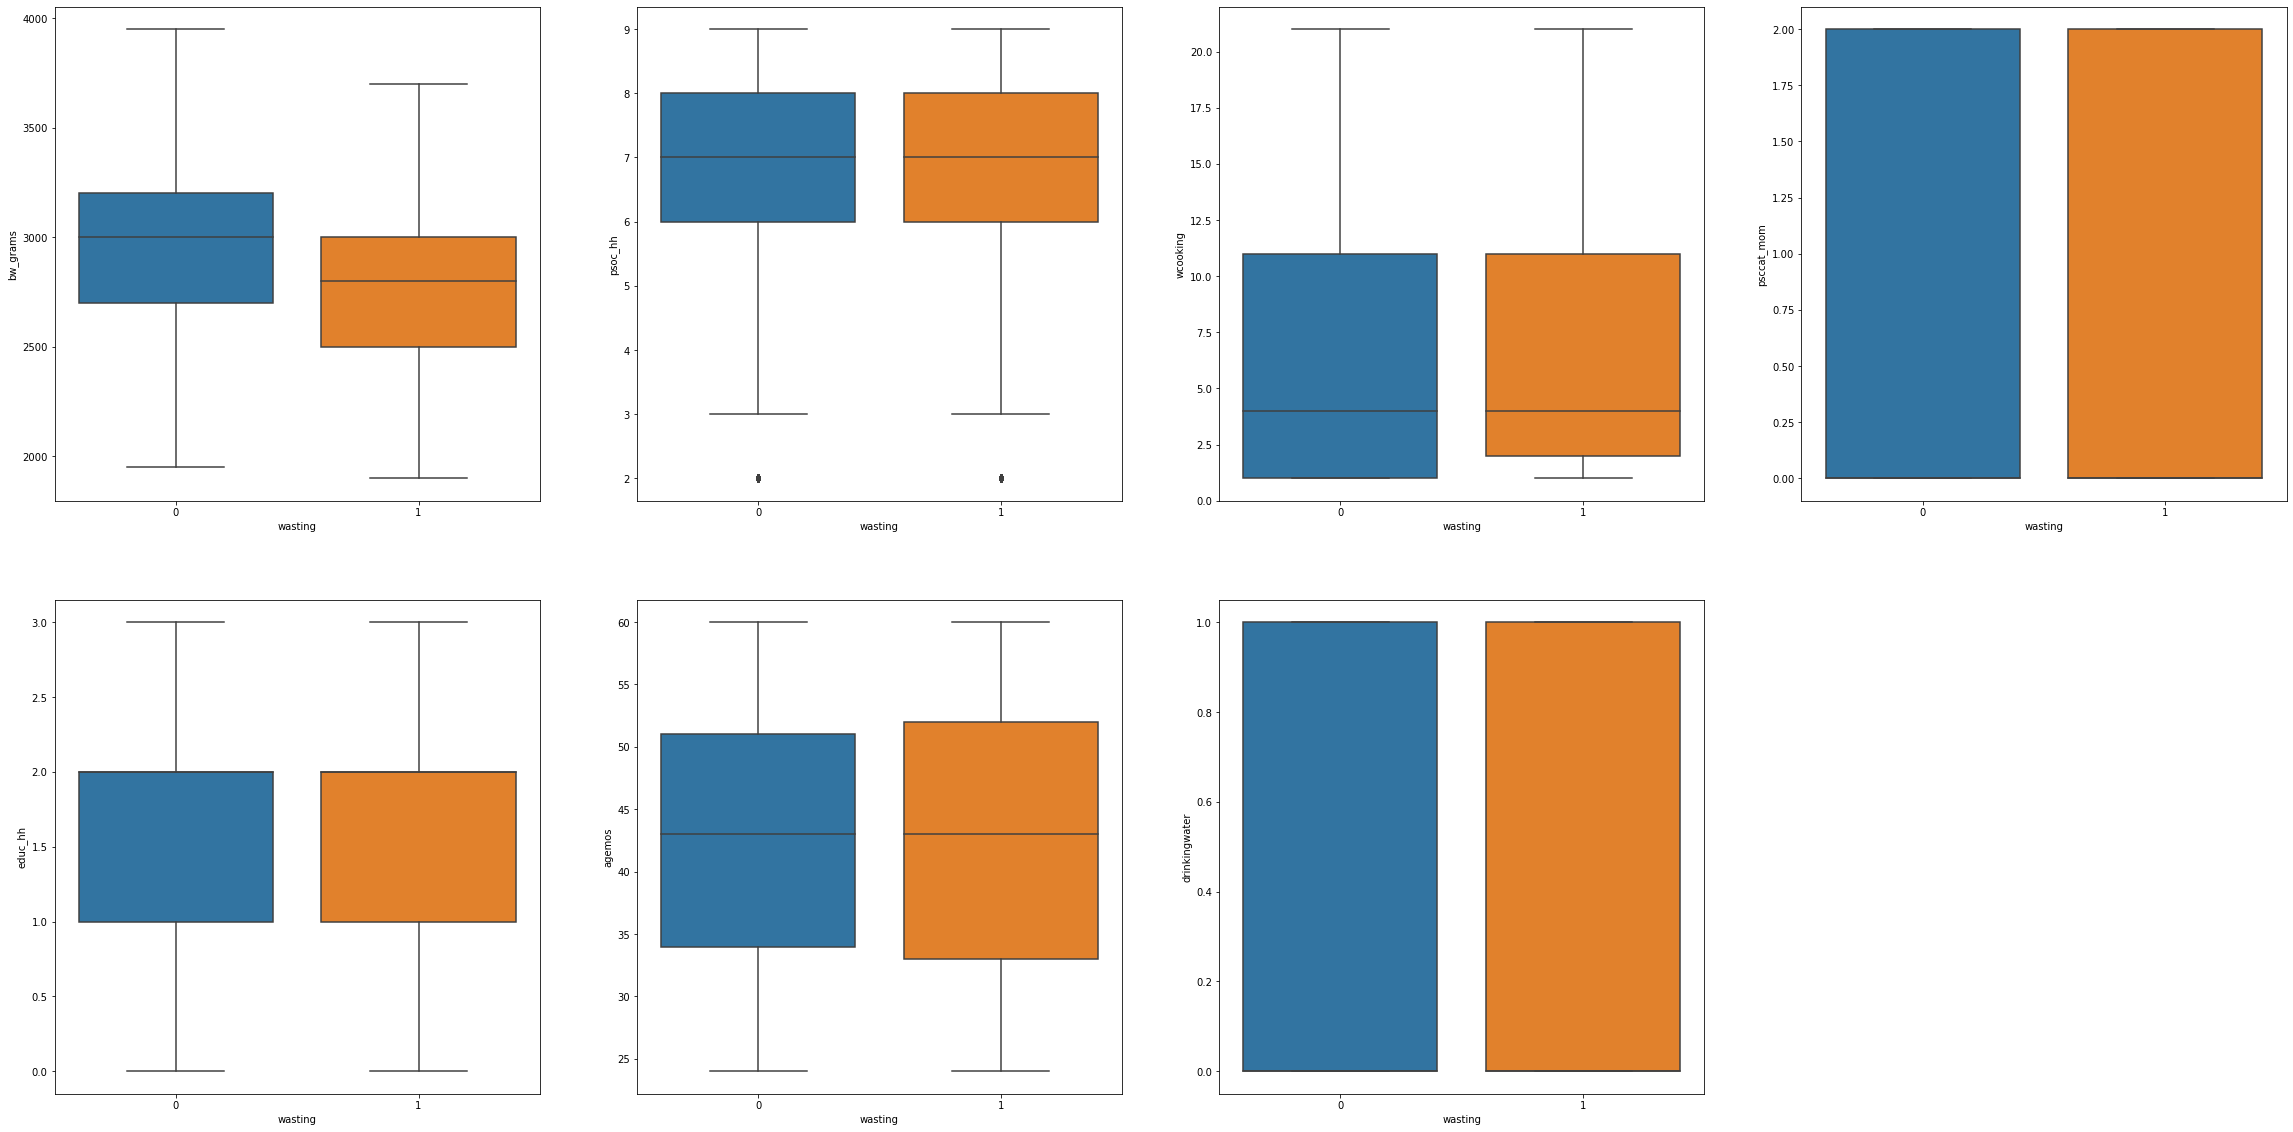

In [44]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="wasting", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('wcooking')

plt.subplot(2,4,4)
graph('psccat_mom')
  
plt.subplot(2,4,5)
graph('educ_hh')

plt.subplot(2,4,6)
graph('agemos')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [101]:
Final1 = df_upsampled[["bw_grams","psoc_hh","wcooking","psccat_mom",
           "educ_hh","agemos"]]
Target1 =df_upsampled['wasting']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final1,Target1,test_size = 0.2, random_state=42)

In [103]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.577
Accuracy score : 0.5661007514611746


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
prediction_r_pred = rforest.fit(X_train,y_train)
rf_pred = prediction_r_pred.predict(X_test)
print("Training score: {:.3f}".format(prediction_r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = prediction_r_pred.predict_proba(X_test)
r = accuracy_score(rf_pred,y_test)

Training score: 0.998
Accuracy score:  0.986362371277484


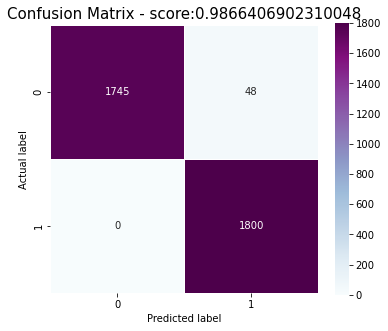

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1793
           1       0.97      1.00      0.99      1800

    accuracy                           0.99      3593
   macro avg       0.99      0.99      0.99      3593
weighted avg       0.99      0.99      0.99      3593



In [105]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [106]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.994
Test score: 0.980


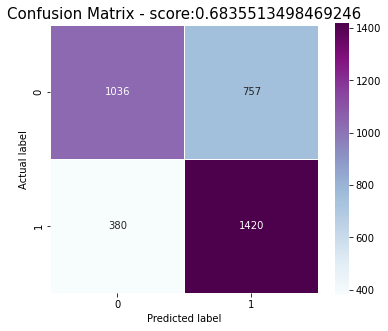

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      1793
           1       0.65      0.79      0.71      1800

    accuracy                           0.68      3593
   macro avg       0.69      0.68      0.68      3593
weighted avg       0.69      0.68      0.68      3593



In [107]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

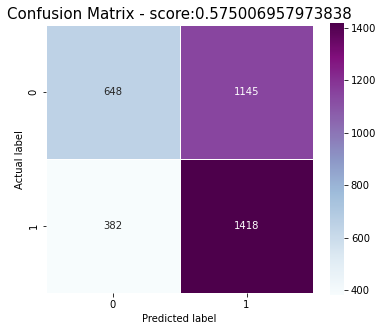

              precision    recall  f1-score   support

           0       0.63      0.36      0.46      1793
           1       0.55      0.79      0.65      1800

    accuracy                           0.58      3593
   macro avg       0.59      0.57      0.55      3593
weighted avg       0.59      0.58      0.55      3593



In [108]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


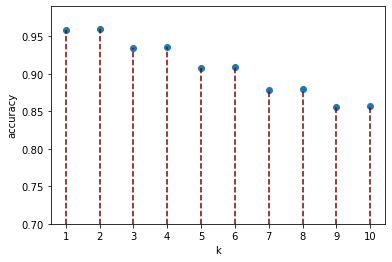

In [109]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

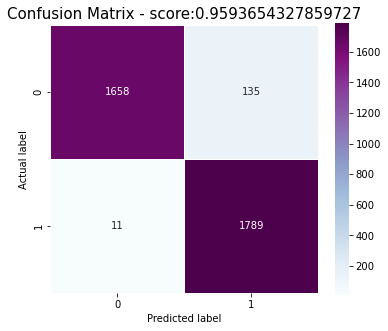

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1793
           1       0.93      0.99      0.96      1800

    accuracy                           0.96      3593
   macro avg       0.96      0.96      0.96      3593
weighted avg       0.96      0.96      0.96      3593



In [110]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [111]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.948221866518199
Testing accuracy =  0.9231839688282772


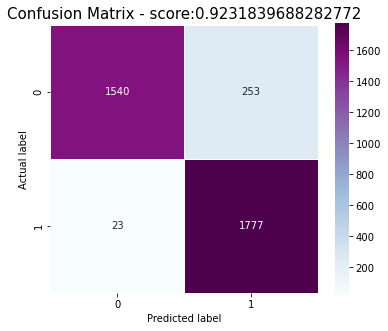

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1793
           1       0.88      0.99      0.93      1800

    accuracy                           0.92      3593
   macro avg       0.93      0.92      0.92      3593
weighted avg       0.93      0.92      0.92      3593



0.9231839688282772

In [112]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [113]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.6040782239543462
Testing accuracy =  0.5972724742554968


0.5972724742554968

In [114]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6090430377393568 0.9976312201772325 0.9970243849538328 0.9970243849538328 0.9755916527235546 0.640946737311768


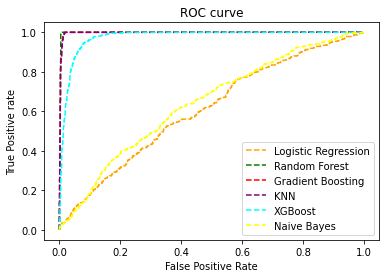

In [115]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [122]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','Extreme Gradient Boosting', 'Naive Bayes Classifier'],
"Accuracy": [ascore,r,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [123]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.566101
1,Random Forest Classifier,0.986362
2,Gradient Boosting Classifier,0.979683
3,SVC,0.575007
4,KNierest Neighbor,0.959365
5,Extreme Gradient Boosting,0.923184
6,Naive Bayes Classifier,0.597272


In [127]:
y_test

1429     0
3546     1
6410     0
2090     1
13851    0
        ..
10032    1
3707     1
12395    1
4203     1
7092     1
Name: wasting, Length: 3593, dtype: int64

In [129]:
X_test.head(10)

,bw_grams,psoc_hh,wcooking,psccat_mom,educ_hh,agemos
1429,3100,6,4,0,2,30
3546,2900,4,1,0,2,57
6410,2500,4,1,0,3,26
2090,2400,8,8,0,2,53
13851,2600,7,12,2,3,37
7503,2500,6,14,2,2,26
408,3115,6,5,0,2,31
3310,2850,6,2,0,1,50
3437,2860,8,8,2,2,37
14201,2800,5,11,1,3,26


In [130]:
 prediction_r_pred.predict([[2400,8,8,0,2,53]])

C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [126]:
import pickle
with open('wasting_rf_random_state59.pkl','wb') as file:
    pickle.dump(prediction_r_pred,file)
X_test.to_csv("X_test_wasting.csv")
X_test.to_csv("y_test_wasting.csv")